## INTRODUCTION TO DISTRIBUTION FUNCTIONS

#### The Concepts

Random variable

Mean, median, mode, standard deviation, variance.

Confidence intervals

Law of large numbers

Central limit theorem

##### Types of Distribution Functions

* Bernoulli

* Binomial

* Gaussian (Normal)

* Poisson



**Random Variable:** 

A variable whose values are selected through a random phenomenon. The underlying phenomenon usually can be described by a typical distribution function.

**iid:** 

Independent and identically distributed random variables have the same probability distribution function but are independent from each other.


**Probability distribution:** 

A function giving the probability of different outcomes in an experiment. There are typical probability distributions that occur often and describe the real world. 

In [3]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
sns.set()
matplotlib.rcParams.update({'font.size': 10, 'figure.figsize': (5, 5)})
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
font = {'family': 'serif',
        'weight': 'normal',
        'size': 15,
        }
warnings.filterwarnings("ignore")

### Bernoulli Distribution
It represents the probability distribution of a random variable that takes the value "1" with probability *p* and the value "0" with probability *q = 1-p*, that is, it can be used to model any single experiment resulting into binary outcome **success/failure**, **true/false** and so on. 

A typical Bernoulli experiment is a coin-toss where "1" and "0" would encode "head" and "tail" respectively.

<details>
The probability mass function *pmf* of such a distribution, over possible outcomes *k*, reads


$$pmf(k;p)=\begin{cases}
p & \text{if $k=1$ success},\\
q = 1-p & \text{if $k=0$ failure}.
\end{cases}$$
 
The mean (expectation value) and variance of a bernoulli random variable *X ~ Bernoulli(p)* are
$$\begin{align*} 
\overline{X} &= p \\ 
\sigma^{2}_{X} &= p*(1-p)
\end{align*}$$
</details>

In [2]:
from scipy.stats import bernoulli

In [4]:
X = np.array([0, 1])
p = .5
bernoulli_pmf = bernoulli.pmf(X, p)

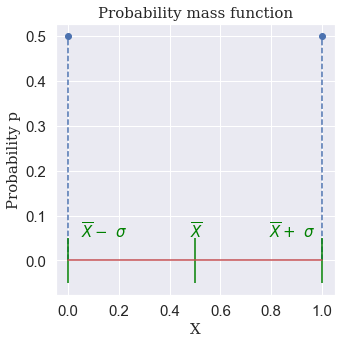

In [5]:
plt.title('Probability mass function', fontdict=font)
plt.xlabel('X', fontdict=font)
plt.ylabel('Probability p', fontdict=font)
plt.text(.05, .05, r'$\overline{X} -\ \sigma$', size=15, color='green')
plt.text(.48, .05, r'$\overline{X}$', size=15, color='green')
plt.text(.79, .05, r'$\overline{X} +\ \sigma$', size=15, color='green')
plt.stem(X, bernoulli_pmf, '--')
plt.vlines(x=[0, .5, 1], ymin=-.05, ymax=.05,
           colors='green', linestyles='solid')

### Draw bernoulli samples

In [6]:
# p = .5 fair coin
p = .5
number_tosses = 20
bernoulli_sample = bernoulli.rvs(p=p, size=number_tosses)
print(
    f'sample: {bernoulli_sample}\nnumber of heads/successes: {sum(bernoulli_sample)}'
)

sample: [0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1]
number of heads/successes: 5


The number of head/successes on coin flips obeys a binomial distribution

### Binomial Distribution
It is frequently employed to model the **number of successes occurring with probability p in a sequence of** *n* **indipendent Bernoulli experiments**.

<details>The probability of getting *k* successes in *n* trials is given by the probability mass function

$$pmf = \dfrac{n!}{(n - k)!}*p^{k}*(1-p)^{n-k}$$

"!" is the factorial, e.g., 3! = 3x2x1

 
The mean (expectation value) and variance of a binomial random variable *X ~ B(n,p)* are

$$\begin{align*} 
\overline{X} &= n*p \\ 
\sigma^{2}_{X} &= n*p*(1-p)
\end{align*}$$
</details>


Let be *X* = number of head/success when tossing n = 10 fair coins

Let's plot this distribution

In [8]:
from scipy.stats import binom

Text(0.5, 1.0, 'Probability mass function \n $B(n = 10, p = 0.5$)')

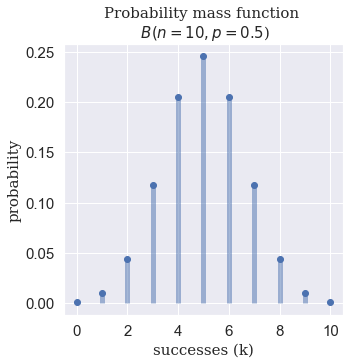

In [11]:
k = np.arange(11)
probs = binom.pmf(k=k, n=10, p=0.5)

x = np.arange(11)
plt.scatter(x, probs, label='$n = 10, p = 0.5 $')
plt.vlines(x, 0, probs, colors='b', lw=5, alpha=0.5)
plt.ylabel('probability', fontdict=font)
plt.xlabel('successes (k)', fontdict=font)
plt.title('Probability mass function \n $B(n = 10, p = 0.5$)', fontdict=font)

Let's draw  10 samples from this distribution

In [13]:
# p = .5 fair coin
np.random.seed(21)
p = .5
n = 10
n_sample = 10
x = binom.rvs(n=n, p=p, size=n_sample)

print(f'Number of heads/successes x:{x}')
print('---' * 22)
print(f'Sample average of the heads/success: {x.mean()}')

Number of heads/successes x:[2 4 6 2 4 2 4 6 4 5]
------------------------------------------------------------------
Sample average of the heads/success: 3.9


Important things to understand about the 'sample mean':
+ how it changes as increasing the sample size
+ is it a random variable?

In [14]:
np.random.seed(21)
binom.rvs(n = 10,p = p, size = 20).mean()

4.65

+ Let's visualize how the sample average changes

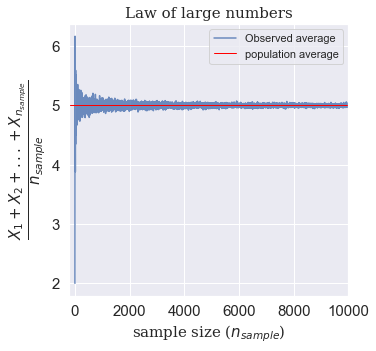

In [15]:
np.random.seed(21)
n_sample = 10000

n = 10
sample_averages= [binom.rvs(n = n,\
                                   p = p, size = i).mean()\
                         for i in range(1, n_sample +1)
                        ]

# plot the sample averages
fig, ax = plt.subplots() 

ax.plot(np.array([i for i in range(1, n_sample +1)]),sample_averages,alpha=.8,label='Observed average' )
ax.axhline(y=5,c="red",linewidth=1.,label='population average');
ax.set_xlim(left=-200.1,right=n_sample)
ax.set_xlabel('sample size ($n_{sample}$)',fontdict=font)
ax.set_ylabel('$\dfrac{X_{1} + X_{2} +...+ X_{n_{sample}}}{n_{sample}}$',fontdict=font)
ax.set_title('Law of large numbers',fontdict=font)
ax.legend();

We observe that as the sample size increases, the sample average converges to the expected value. 

Is the sample mean a random Variable?

In [16]:
def repeated_experiment(n_sample):
    sample_means = [binom.rvs(n = n,p = .5, size = n_sample).mean()\
            for i in range(1, 5000)]
    return sample_means

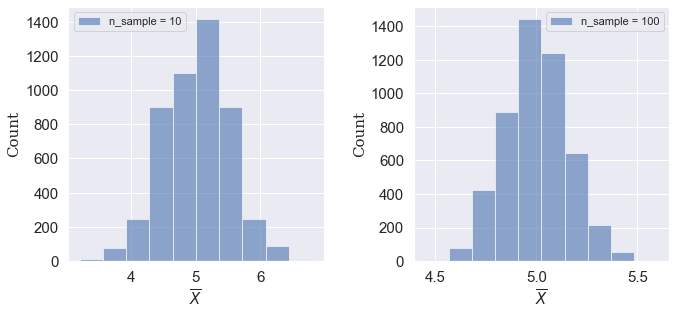

In [17]:
np.random.seed(21)
# Central Limit theorem
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
(ax1, ax2) = ax

# N = 3
ax1.hist(repeated_experiment(10),
         density=False,cumulative=False,
         alpha=.6,label= 'n_sample = 10')
ax1.set_xlabel('$\overline{X}$',fontdict=font)
ax1.set_ylabel('Count',fontdict=font)
#sns.distplot(repeated_experiment(10),hist=False,ax=ax1,fit=norm)
ax1.legend()


# N = 10
ax2.hist(repeated_experiment(100),
         density=False,cumulative=False,
         alpha=.6,label= 'n_sample = 100')
ax2.set_xlabel('$\overline{X}$',fontdict=font)
ax2.set_ylabel('Count',fontdict=font)
#sns.distplot(repeated_experiment(10),hist=False,ax=ax2,fit=norm)
ax2.legend()
plt.tight_layout(pad=2.9);


As we can see in the sequence of plots, the sample mean $\overline{X}$ behaves as a normally distributed random variable. The normal distribution has the same mean as the original distribution and a variance that equals the original variance divided by the sample size.

This is actually a general behaviour: when many **indipendent, identically distributed (i.i.d.) random variable** are added up, they result in a normal distribution irrespective from the original distribution. (**CENTRAL LIMIT THEOREM**).

### Normal (Gaussian) distribution

It is one of the most prevalent distribution in the natural world. In fact, many quantities takes values from an underlying normal distribution (heights, blood pressure, measurement error,..).

In [18]:
from numpy.random import normal

In [19]:
from scipy.stats import norm # we use this for calculating pdf and cdf easily

Probability density function

In [20]:
x = np.linspace(0,20,2000)

In [21]:
pdf = norm(10,3).pdf(x)

Draw random number from a normal distribution

In [22]:
np.random.seed(21)

mean = 10
std = 3

sample = normal(mean, std, 2000)

Plot the sample distribution

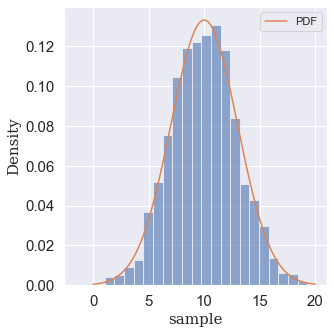

In [23]:
plt.hist(sample,density =True,bins=24,alpha=.6,cumulative=False)
sns.lineplot(x,pdf,label='PDF')
plt.tight_layout(pad=2.9)
plt.ylabel('Density',fontdict=font)
plt.xlabel('sample',fontdict=font);



Plot cumulative distribution function

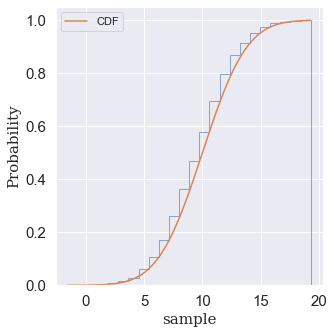

In [24]:
plt.hist(sample,density =True,bins=24,alpha=.6,cumulative=True,histtype='step')
sns.lineplot(sample,norm(10,3).cdf(sample),label='CDF')
plt.tight_layout(pad=2.9)
plt.ylabel('Probability',fontdict=font)
plt.xlabel('sample',fontdict=font);

Cumulative Distribution Function gives the probability that a random variable will take up a value up to a certain cut-off.

#### Let's change the variance

In [25]:
#sample 2
std2 = 1
sample2 = normal(mean,std2,size=2000)

#sample 3
std3 = 5
sample3 = normal(mean,std3,size=2000)

Plot the sample distributions

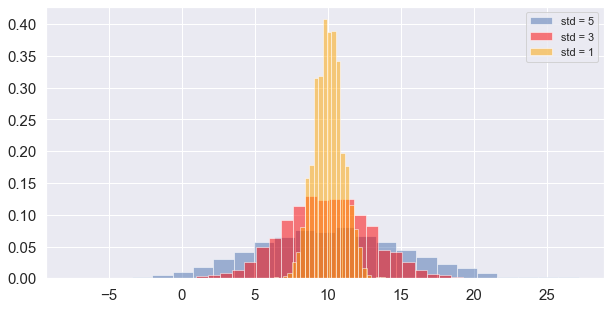

In [26]:
plt.figure(figsize=(10,5))

plt.hist(sample3,density =True,bins=25,color='b',alpha=.5,label='std = 5')
plt.hist(sample,density=True,bins=25,color='red',alpha=.5,label='std = 3')
plt.hist(sample2,density =True,bins=25,color='orange',alpha=.5,label='std = 1');
plt.legend();

### CONFIDENCE INTERVAL
It is a range of likely values for the population parameter

$$ CI = \bar{x} \pm z \frac{\sigma}{\sqrt{n}}$$


In the above equation the $\sigma$ is the standard deviation, z is the confidence level and n is the sample size.

-----
68.2 - 95 - 99.97 % CI correspond to 1-2-3 $\sigma$ levels.

a 95% CI means that if we were to take 100 different samples and compute a 95% confidence interval for each sample, then approximately 95 of the 100 confidence intervals will contain the true (population) mean value. 

Think about the error bars. (In economics 2 $\sigma$ errors are common, in astronomy you try 3).

+ where do 68.2 - 95 - 99.97 % come from  ?

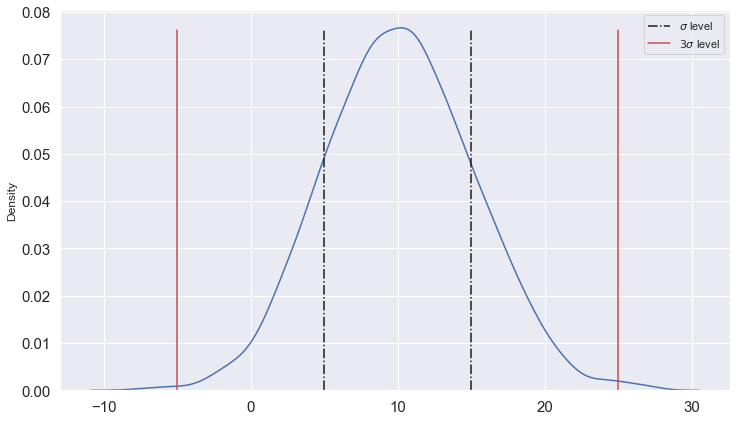

In [27]:
plt.figure(figsize=(12,7))

sns.distplot(sample3, hist = False, kde = True)
y = np.arange(100)/1300
x = np.zeros(100) + 10
plt.plot(x + std3 ,y,'-.k',label = '$\sigma$ level')
plt.plot(x - std3 ,y,'-.k')
plt.plot(x + 3* std3 ,y,'r',label = '$3 \sigma$ level')
plt.plot(x - 3 * std3 ,y,'r')

plt.legend()

### POISSON DISTRIBUTION (in the course material)
It expresses the probability that a certain number of events occuring in a given time interval knowing that these events occur with a certain rate

The probability is given by *$p = r^x e^{-r}/x!$*

where
----------------------- ------------------------------------

t: time interval

r =  rate (is average number of events happening in a given interval) 

x: value for which you are trying to calculate the probability.
----------------------- ------------------------------------

**Question:** Let's say 5 people on average come at the reception every hour. What is the probability of 11 people coming in the tomorrow at this hour?

*$p = r^x e^{-r}/x!$*

*$p = 5^{11} e^{-5}/11!$*

In [29]:
p = 5 ** 5 * math.exp(-5) / math.factorial(5)
p


0.1754673697678507

Normal Distribution function from scratch

In [ ]:
x_n = np.linspace(-5,5,50000)
sd= 1
mn=0

# PDF of the Gaussian gives the probabilities on the
# y axis for the x values.
def pdf_normal(x,sd,mn):
    """Function that creates a vector with
    the probabilities for a normal distribution.
    x is the random variable, sd is standard 
    deviation and mn is mean."""
    
    x=x
    y = 1/(sd * math.sqrt(2*math.pi))*np.exp(-(x-mn)**2/(2*sd**2))
    return y
    
seed = 1005
y_np = np.random.normal(mn,sd,1000)
y = pdf_normal(x_n,sd,mn)

# PLOTTING 
plt.figure(figsize=[12,7])